In [317]:
from IPython.display import display
import numpy as np
import pandas as pd 

pd.set_option('display.max_columns', 40) # выводить больше столбцов
pd.set_option('display.max_rows', 40)   # выводить больше строк
# plt.style.use('default')    # корректный вывод графиков в темной теме Matplotlib
# fig.show(renderer='notebook') #включение анимации
#!/usr/bin/env python

import io
import zipfile
import requests  # $ pip install requests


# unzip with link
r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/ce42b95793b6abb664068d5865e0df1a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/iris.zip") # link
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
  archive.extractall('data')

# # unzip file on the disk
# with zipfile.ZipFile('data/wine_cleared.zip', 'r') as archive:
#     archive.extractall('data')
# https://lms.skillfactory.ru/assets/courseware/v1/ce42b95793b6abb664068d5865e0df1a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/iris.zip

In [318]:
iris = pd.read_csv('data/iris.csv', sep=',')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<AxesSubplot:>

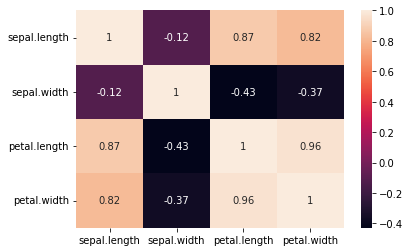

In [319]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [320]:
# Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.
# Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

iris = iris.drop(['petal.width'], axis=1)
# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

iris = iris.drop(['petal.length'], axis=1)
# Посмотрим на результат:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


In [321]:
import io
import zipfile
import requests  # $ pip install requests


# unzip with link
r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/4c039196d06f012765bcd040c5ed6631/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/heart.zip") # link
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
  archive.extractall('data')

# # unzip file on the disk
# with zipfile.ZipFile('data/wine_cleared.zip', 'r') as archive:
#     archive.extractall('data')


# https://lms.skillfactory.ru/assets/courseware/v1/4c039196d06f012765bcd040c5ed6631/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/heart.zip

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [322]:
heart = pd.read_csv('data/heart.csv', sep=',')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [323]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [324]:
pressure = pd.read_csv('data/pressure.csv', sep=';', encoding='cp1251')
pressure

,Возраст (лет),Мужчины,Женщины
0,до 20,123/76,116/72
1,21-30,126/79,120/75
2,31-40,129/81,127/80
3,41-50,135/83,137/84
4,51-60,142/85,144/85
5,61 и старше,142/80,159/85


In [325]:
# Задание 8.2  
# https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/courseware/64fb8f8af1424a7788ba0e45453617fc/d20b06b382494369b01d0b71187d7424/9?activate_block_id=block-v1%3ASkillFactory%2BDSPR-2.0%2B14JULY2021%2Btype%40vertical%2Bblock%409ddd64598c6f42fd848e445f7f5acc1e

file_destination = 'data/pressure.csv'

def make_sys_pressure_dict():
    ''' making a dict for mean pressure by sex by age feature'''
    pressure_table = pd.read_csv('data/pressure.csv', sep=';', encoding='cp1251')
    number_age_segments = len(pressure_table)
    men = 1  # collumns in file
    women = 2  # collumns in file
    whole_dict = {}
    man_dict = {}
    woman_dict = {}
    for line in range(number_age_segments):
        man_pres_str = pressure_table.iloc[line][men]
        woman_pres_str = pressure_table.iloc[line][women]
        if not line:  # processing first row "under_space_XXage"
            age_str = pressure_table.iloc[line][0]
            man_dict.update({int(age_str[age_str.find(' ')+1:]) : int(man_pres_str[:man_pres_str.find('/')])})
            woman_dict.update({int(age_str[age_str.find(' ')+1:]) : int(woman_pres_str[:man_pres_str.find('/')])}) 
        elif line != number_age_segments - 1: # processing intermidiate rows "XX_dash_XXage"
            age_str = pressure_table.iloc[line][0]
            man_dict.update({int(age_str[age_str.find('-')+1:]) : int(man_pres_str[:man_pres_str.find('/')])})
            woman_dict.update({int(age_str[age_str.find('-')+1:]) : int(woman_pres_str[:man_pres_str.find('/')])}) 
        else: # processing last row "over_space_XXage"
            age_str = pressure_table.iloc[line-1][0]
            man_dict.update({np.inf : int(man_pres_str[:man_pres_str.find('/')])})
            woman_dict.update({np.inf : int(woman_pres_str[:man_pres_str.find('/')])}) 
    whole_dict.update({1: man_dict, 0: woman_dict})
    return(whole_dict)
whole_dict = make_sys_pressure_dict()

def trestbps_mean(person_age, sex):
    ''' adding new feature of mean pressure by age & sex according to pressure table'''
    whole_dict = make_sys_pressure_dict()
    for age, pres in whole_dict[sex].items():
        if age >= person_age:
            return pres

heart['trestbps_mean'] = pd.Series(map(trestbps_mean, heart['age'], heart['sex']))
print(whole_dict)
heart['trestbps_mean'][300]
len(heart.columns)

{1: {20: 123, 30: 126, 40: 129, 50: 135, 60: 142, inf: 142}, 0: {20: 116, 30: 120, 40: 127, 50: 137, 60: 144, inf: 159}}


16

In [326]:
from sklearn.preprocessing import OneHotEncoder  # импортируем библиотеку для работы с кодировщиками
encoder = OneHotEncoder() 
data_bin = pd.DataFrame(encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca','thal']]).toarray())
data_bin.columns = encoder.get_feature_names_out(['cp', 'restecg', 'slope', 'ca','thal'])
heart = pd.concat([heart, data_bin], axis=1)

display(heart.head())
len(heart.columns)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


35

In [327]:
# Задание 8.6

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler  # импортируем библиотеку для работы с кодировщиками
# display(heart.info())
scaler = RobustScaler()
data_bin_r = pd.DataFrame(scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']]), columns=heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']].columns)
scaler = MinMaxScaler()
data_bin_mm = pd.DataFrame(scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']]), columns=heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']].columns)
scaler = StandardScaler()
data_bin_s = pd.DataFrame(scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']]), columns=heart[['age', 'trestbps', 'chol', 'thalach','oldpeak']].columns)

data_bin_r.describe()


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.672748,0.876907,0.816232,0.704774,0.725672
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.629630,3.500000,5.102362,1.507692,3.375000


In [328]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446,0.260726,-0.066007,0.471947,0.165017,0.287129,0.075908,0.485149,-0.498350,0.013201,0.069307,0.462046,0.468647,-0.422442,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,-0.452145,0.386139
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835,0.439757,1.487564,0.500038,0.371809,0.453171,0.265288,0.500606,0.500824,0.114325,0.254395,0.499382,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000,0.000000,-3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000,1.000000,3.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


<AxesSubplot:>

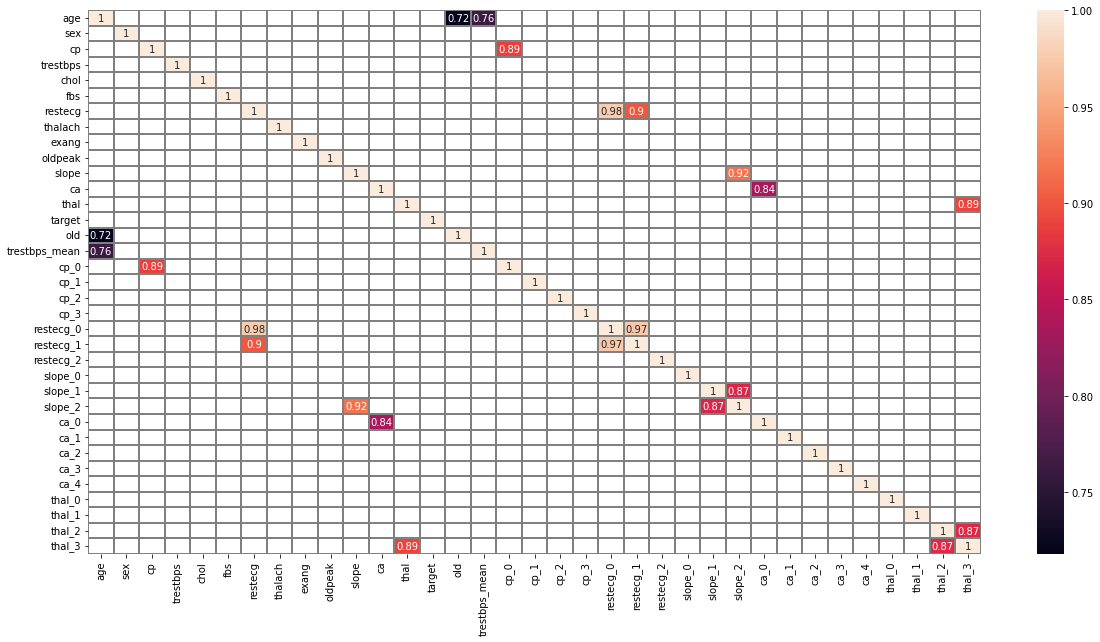

In [332]:
import seaborn as sns # импортируем seaborn для построения графиков
import matplotlib.pyplot as plt

corr = heart_r.corr().abs()
highcorr = corr[corr>=.65]
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(highcorr, annot=True, linewidths=0.3, ax=ax  , linecolor='grey')